<a href="https://colab.research.google.com/github/saori0703-cyber/cyclistic-bike-share-analysis/blob/main/Coursera_GoogleDataAnalytics_CaseStudy_Bike_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Business Task summary
2. Import packages
3. Load data
4. Data cleaning & wrangling
5. Feature engineering (ride_length, day_of_week)
6. Descriptive analysis
7. Visualization
8. Insights & recommendations

In [2]:
# ==============================
# 1. Import packages
# ==============================
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 2. Load CSV files
# ==============================
# ▼ あなたのローカル or Google Drive のパス
files = [
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202104-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202105-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202106-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202107-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202108-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202109-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202110-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202111-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202112-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202201-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202202-divvy-tripdata.csv",
    "/content/drive/MyDrive/Colab Notebooks/Coursera_GoogleDataAnalytics_CaseStudy_Bike-Share/202203-divvy-tripdata.csv"
]


dfs = []

for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

# Combine data
rides = pd.concat(dfs, ignore_index=True)

# Check data
rides.head()
rides.info()

# ==============================
# 3. Create new columns
# ==============================

# Convert datetime
rides['started_at'] = pd.to_datetime(rides['started_at'])
rides['ended_at'] = pd.to_datetime(rides['ended_at'])

# Ride length (in minutes)
rides['ride_length'] = (rides['ended_at'] - rides['started_at']).dt.total_seconds() / 60

# Day of week
rides['day_of_week'] = rides['started_at'].dt.dayofweek  # Monday=0...Sunday=6

# ==============================
# 4. Filter abnormal data
# ==============================

# Remove negative and extremely long rides
rides = rides[rides['ride_length'] > 0]
rides = rides[rides['ride_length'] < 1440]  # Less than 24 hours

# Check after cleaning
rides.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.7+ MB


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length,day_of_week
count,5718735,5718735,5.718735e+06,5.718735e+06,5.716882e+06,5.716882e+06,5.718735e+06,5.718735e+06
mean,2021-08-26 22:29:15.149145856,2021-08-26 22:48:20.692240384,4.190067e+01,-8.764630e+01,4.190091e+01,-8.764650e+01,1.909238e+01,3.152591e+00
min,2021-04-01 00:03:18,2021-04-01 00:14:29,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,1.666667e-02,0.000000e+00
25%,2021-06-22 15:28:27,2021-06-22 15:51:20,4.188132e+01,-8.766014e+01,4.188132e+01,-8.766028e+01,6.566667e+00,1.000000e+00
50%,2021-08-17 18:28:44,2021-08-17 18:46:46,4.189871e+01,-8.764195e+01,4.189897e+01,-8.764288e+01,1.171667e+01,3.000000e+00
75%,2021-10-14 19:50:16.500000,2021-10-14 20:03:49.500000,4.192889e+01,-8.762775e+01,4.192914e+01,-8.762775e+01,2.130000e+01,5.000000e+00
max,2022-03-31 23:59:47,2022-04-01 00:27:32,4.563503e+01,-7.379648e+01,4.216812e+01,-8.749000e+01,1.439950e+03,6.000000e+00
std,NaN,NaN,4.647386e-02,2.974244e-02,4.657198e-02,2.935094e-02,3.560087e+01,1.999667e+00


In [4]:
# ライダータイプ別の基本統計（平均・中央値・STD）
rides.groupby('member_casual')['ride_length'].agg(['mean','median','std','count'])

,mean,median,std,count
member_casual,,,,
casual,26.526035,15.750000,47.271513,2542546
member,13.141732,9.366667,20.335981,3176189


In [7]:
# 曜日別の利用傾向
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
rides['day_name'] = rides['day_of_week'].map(day_map)

rides.groupby(['member_casual','day_name'])['ride_length'].mean().reset_index()

,member_casual,day_name,ride_length
0,casual,Fri,24.738358
1,casual,Mon,26.834802
2,casual,Sat,28.889176
3,casual,Sun,30.687227
4,casual,Thu,22.947909
5,casual,Tue,23.924582
6,casual,Wed,23.113076
7,member,Fri,12.921129
8,member,Mon,12.729501
9,member,Sat,14.698359


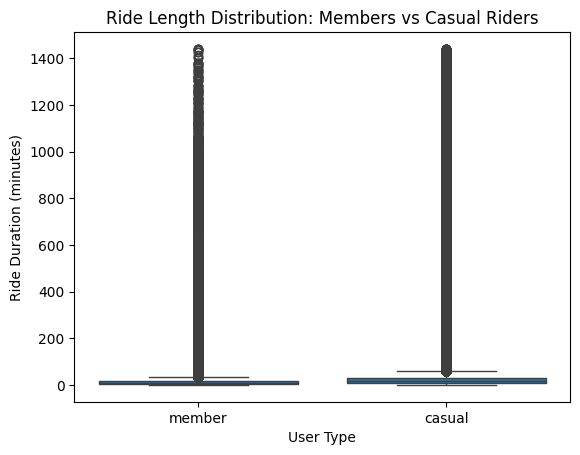

In [8]:
# 平均利用時間（会員 vs カジュアル）
sns.boxplot(data=rides, x='member_casual', y='ride_length')
plt.title("Ride Length Distribution: Members vs Casual Riders")
plt.xlabel("User Type")
plt.ylabel("Ride Duration (minutes)")
plt.show()


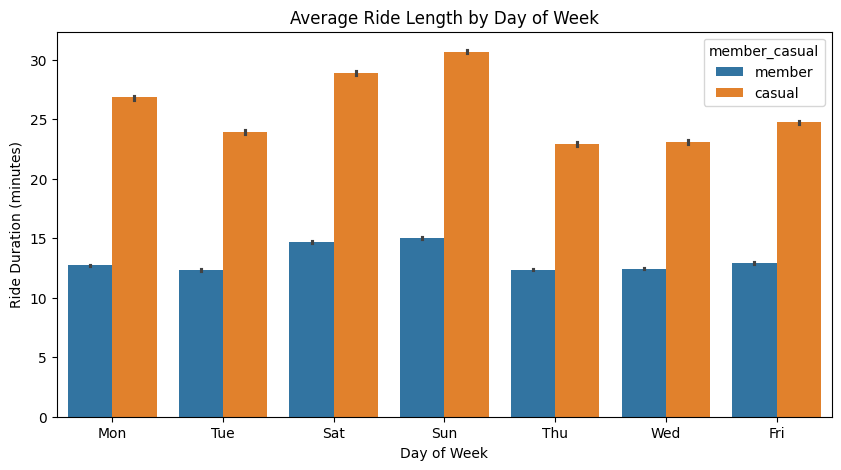

In [9]:
# 曜日別利用時間（棒グラフ）
plt.figure(figsize=(10,5))
sns.barplot(data=rides, x='day_name', y='ride_length', hue='member_casual')
plt.title("Average Ride Length by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Ride Duration (minutes)")
plt.show()


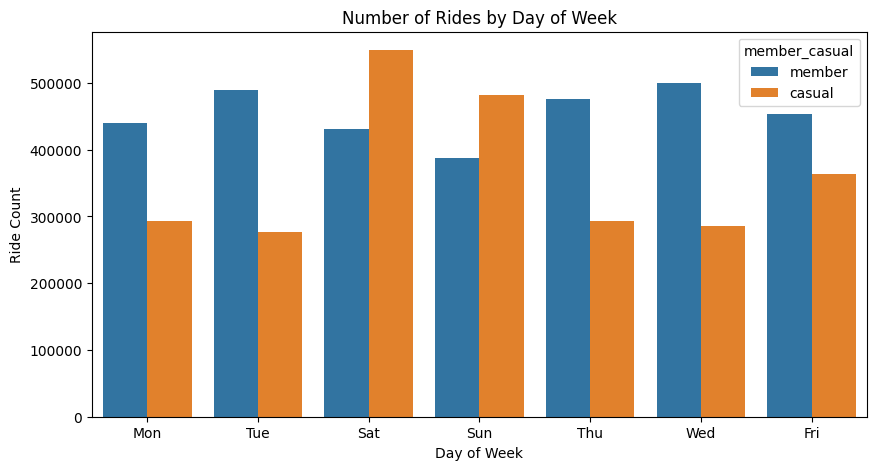

In [10]:
# 利用回数（曜日 × 会員種別）
rides.groupby(['member_casual','day_name'])['ride_length'].count().reset_index()

plt.figure(figsize=(10,5))
sns.countplot(data=rides, x='day_name', hue='member_casual')
plt.title("Number of Rides by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Ride Count")
plt.show()
